# Analysis on  Property crime in india

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('property.csv')

In [3]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


# Lucky no null value

In [4]:
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [5]:
df.shape

(2449, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [7]:
df1=df.drop(['Sub_Group_Name'],axis='columns')

In [8]:
df1.rename(columns = {'Area_Name':'State/UT'}, inplace = True)
df1.rename(columns = {'Group_Name':'Types of crime'}, inplace = True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State/UT                     2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Types of crime               2449 non-null   object
 3   Cases_Property_Recovered     2449 non-null   int64 
 4   Cases_Property_Stolen        2449 non-null   int64 
 5   Value_of_Property_Recovered  2449 non-null   int64 
 6   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 134.1+ KB


In [10]:
df2=df1.drop(['Value_of_Property_Recovered','Value_of_Property_Stolen'],axis='columns')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UT                  2449 non-null   object
 1   Year                      2449 non-null   int64 
 2   Types of crime            2449 non-null   object
 3   Cases_Property_Recovered  2449 non-null   int64 
 4   Cases_Property_Stolen     2449 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 95.8+ KB


In [12]:
df2['Types of crime'].unique()

array(['Burglary - Property', 'Criminal Breach of Trust - Property',
       'Dacoity -Property', 'Other heads of Property',
       'Robbery - Property', 'Theft - Property', 'Total Property'],
      dtype=object)

In [13]:
df2[["Cases_Property_Stolen","Cases_Property_Recovered"]].describe()

,Cases_Property_Stolen,Cases_Property_Recovered
count,2449.000000,2449.000000
mean,3419.420988,1232.892201
std,8136.256820,3079.573907
min,0.000000,0.000000
25%,45.000000,13.000000
50%,358.000000,113.000000
75%,1875.000000,722.000000
max,80663.000000,27960.000000


In [14]:
df2['Types of crime'].unique()

array(['Burglary - Property', 'Criminal Breach of Trust - Property',
       'Dacoity -Property', 'Other heads of Property',
       'Robbery - Property', 'Theft - Property', 'Total Property'],
      dtype=object)

In [15]:
  df2 = df2.drop(df2[df2['Types of crime']=='Total Property'].index)

In [16]:
df2['Types of crime'].unique()

array(['Burglary - Property', 'Criminal Breach of Trust - Property',
       'Dacoity -Property', 'Other heads of Property',
       'Robbery - Property', 'Theft - Property'], dtype=object)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UT                  2100 non-null   object
 1   Year                      2100 non-null   int64 
 2   Types of crime            2100 non-null   object
 3   Cases_Property_Recovered  2100 non-null   int64 
 4   Cases_Property_Stolen     2100 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 98.4+ KB


In [18]:
grp=df2.groupby("Types of crime")
x1 = grp['Cases_Property_Stolen'].sum()
y1 = grp['Cases_Property_Recovered'].sum()
print(x1)
print(y1)

Types of crime
Burglary - Property                     900772
Criminal Breach of Trust - Property     103164
Dacoity -Property                        48178
Other heads of Property                 204914
Robbery - Property                      187125
Theft - Property                       2742941
Name: Cases_Property_Stolen, dtype: int64
Types of crime
Burglary - Property                    283804
Criminal Breach of Trust - Property     40151
Dacoity -Property                       20097
Other heads of Property                 88780
Robbery - Property                      91104
Theft - Property                       985742
Name: Cases_Property_Recovered, dtype: int64


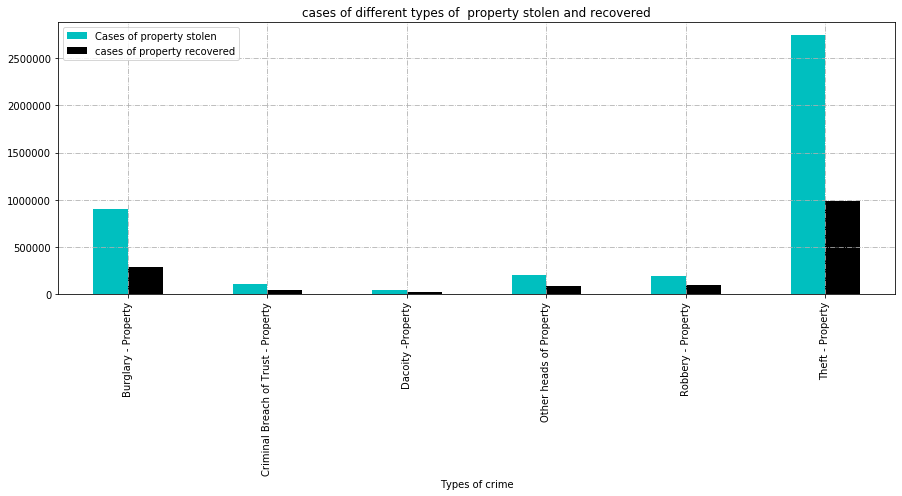

In [19]:
df_state= pd.DataFrame({'Cases of property stolen': x1,
                   'cases of property recovered': y1})

df_state.plot.bar(figsize=(15,5),color=('c','black'),title='cases of different types of  property stolen and recovered')

plt.grid(linestyle='-.')

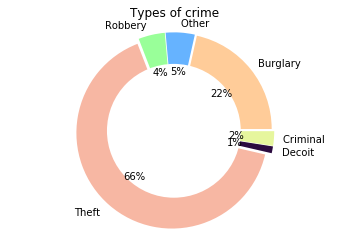

In [20]:
my_data = [900772,204914,187125,2742941,48178,103164]
my_labels = 'Burglary ','Other ','Robbery ','Theft ','Decoit','Criminal '
colors = ['#ffcc99','#66b3ff','#99ff99','#F7B7A3','#2b0b3f','#E6F69D']
plt.axis("equal")
plt.pie(
my_data,
labels=my_labels,explode=[0.03,0.03,0.03,0.03,0.05,0.05],colors=colors,autopct='%1.f%%')
# Changing the pie chart to donut chart to look more cool and AWESOME!
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Types of crime')
plt.axis('equal')
plt.show()

In [25]:
stolen=df2['Cases_Property_Stolen'].sum()
recovered=df2['Cases_Property_Recovered'].sum()
print("cases of property stolen   =",stolen)
print("cases of property recovered=",recovered)

cases of property stolen   = 4187094
cases of property recovered= 1509678


cases of property stolen   = 4187094
cases of property recovered= 1509678


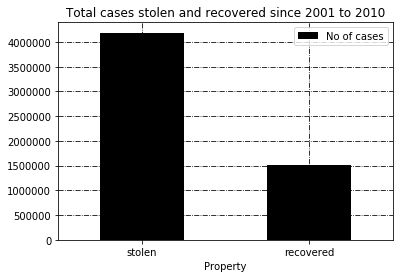

In [32]:
print("cases of property stolen   =",stolen)
print("cases of property recovered=",recovered)
df_total= pd.DataFrame({'Property':['stolen', 'recovered'], 'No of cases':[4187094,1509678]})
df_total.plot.bar(x='Property', y='No of cases',color="black",rot=0,title='Total cases stolen and recovered since 2001 to 2010')

plt.grid(linestyle='-.',color='black')

In [27]:
x=df.groupby('Year')['Cases_Property_Stolen','Cases_Property_Recovered'].sum()
x

C:\Users\vj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Cases_Property_Stolen,Cases_Property_Recovered
Year,,
2001,790836,272842
2002,774302,281302
2003,755556,279802
2004,812392,294758
2005,799578,307632
2006,813294,306076
2007,857074,316587
2008,912990,323048
2009,911884,310796


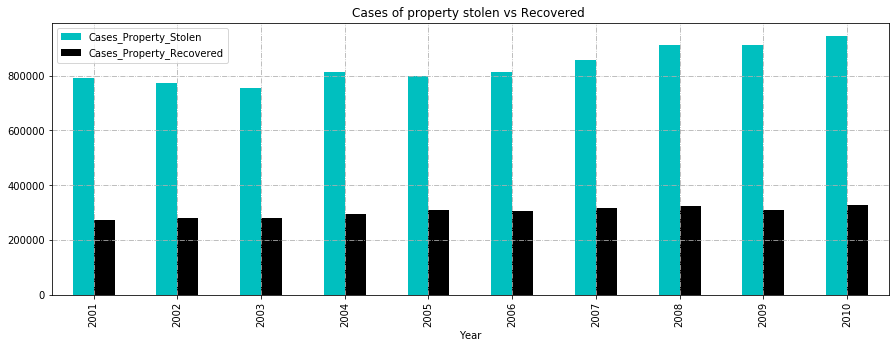

In [28]:
x.plot(kind='bar',figsize=(15,5),color=("c","black"),title=('Cases of property stolen vs Recovered '))

plt.grid(linestyle='-.')


In [29]:
grp=df2.groupby('State/UT')
x2 = grp['Cases_Property_Stolen'].sum()
y2 = grp['Cases_Property_Recovered'].sum()
print(x2)
print(y2)

State/UT
Andaman & Nicobar Islands      1831
Andhra Pradesh               321411
Arunachal Pradesh              8316
Assam                        122780
Bihar                        205920
Chandigarh                    19860
Chhattisgarh                  99856
Dadra & Nagar Haveli           1321
Daman & Diu                    1028
Delhi                        245347
Goa                            9894
Gujarat                      267030
Haryana                      151668
Himachal Pradesh              17000
Jammu & Kashmir               37453
Jharkhand                     88434
Karnataka                    247484
Kerala                       110826
Lakshadweep                     184
Madhya Pradesh               366762
Maharashtra                  688407
Manipur                        5792
Meghalaya                      8362
Mizoram                       13446
Nagaland                       5407
Odisha                       112140
Puducherry                     7118
Punjab             

<function matplotlib.pyplot.show(*args, **kw)>

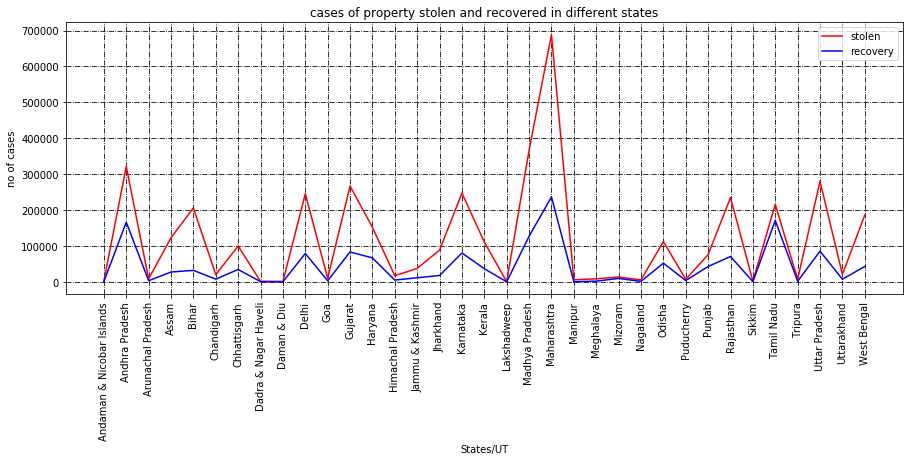

In [36]:
from matplotlib import style

plt.figure(figsize=(15,5))

plt.plot(x2,'r-', color='red',label="stolen")
plt.plot(y2,'r-', color='blue',label="recovery")

#x1.plot(kind='bar',color='c',label="stolen")
#y1.plot(kind='bar',color='black',label="recovery")

plt.xticks(rotation=90)
plt.title('cases of property stolen and recovered in different states')
plt.xlabel('States/UT')
plt.ylabel('no of cases')

plt.grid(linestyle='-.',color ="black")
plt.legend()
plt.show

# Conclusion:

*Every year property crime is increasing.

*Type of property crime that is highest is :Theft-Property(66%).

*Maharashtra has the highest rate of property crime.